#Importando as bibliotecas:

In [62]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report,mean_squared_error, r2_score, accuracy_score, confusion_matrix

import seaborn as sns
sns.set(style='whitegrid')

## 📂 Carregando o Dataset


In [3]:
# Use a função read_csv do pandas com a URL correta para ler a planilha como um CSV
!gdown '1gn8za6CPhzaG4nj5BN8E1Fqkx09neIrW'

df = pd.read_excel('/content/SalarioxLimite_RegressaoLinear.xlsx')

Downloading...
From: https://drive.google.com/uc?id=1gn8za6CPhzaG4nj5BN8E1Fqkx09neIrW
To: /content/SalarioxLimite_RegressaoLinear.xlsx
100% 12.6k/12.6k [00:00<00:00, 29.7MB/s]


In [4]:
df.head()

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [6]:
print(df)

        Salario  Limite_Emprestimo
0   1250.219130        2900.124323
1   1262.721321        2929.125566
2   1275.348535        2958.416822
3   1288.102020        2988.000990
4   1300.983040        3017.881000
..          ...                ...
94  3185.629581        7279.937858
95  3217.485877        7315.799621
96  3249.660736        7351.661384
97  3282.157343        7387.523147
98  3314.978916        7423.384910

[99 rows x 2 columns]


In [7]:
df.tail()

,Salario,Limite_Emprestimo
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147
98,3314.978916,7423.384910


In [8]:
print(df.describe())

           Salario  Limite_Emprestimo
count    99.000000          99.000000
mean   2119.100581        4900.652060
std     600.832983        1378.113961
min    1250.219130        2900.124323
25%    1595.383780        3700.800280
50%    2035.792243        4722.412623
75%    2597.840528        6026.191986
max    3314.978916        7423.384910


In [61]:
# Ver a contagem de valores não nulos e as informações sobre o dtaset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


De acordo com o "df.info()" não existe valores nulos

### 📊 Visualização da Distribuição do Dataset


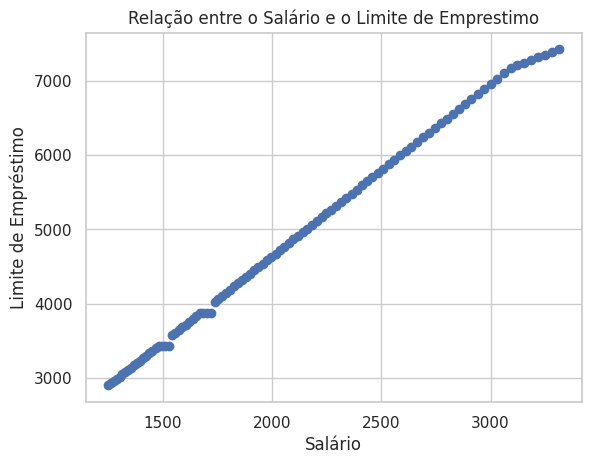

In [55]:
# Gráfico de dispersão
plt.scatter(df['Salario'], df['Limite_Emprestimo'])
plt.xlabel('Salário')
plt.ylabel('Limite de Empréstimo')
plt.title('Relação entre o Salário e o Limite de Emprestimo')
plt.show()

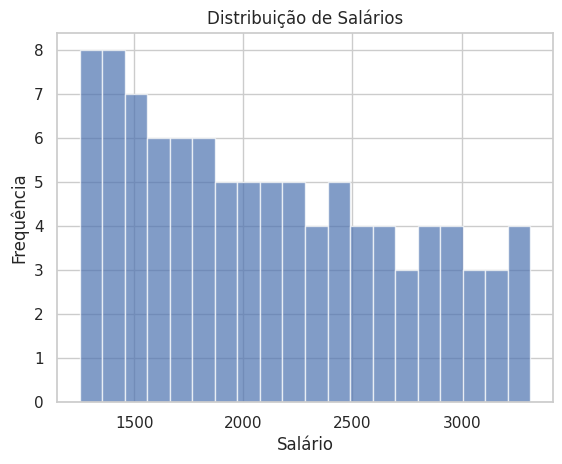

In [12]:
plt.hist(df['Salario'], bins=20, alpha=0.7)
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.title('Distribuição de Salários')
plt.show()

### 🛠️ Divisão de Dados e Treinamento


---



Agora vamos dividir o dataset em um conjunto de treinamento e um conjunto de teste. Usaremos 80% dos dados para treinamento e 20% para teste.


In [33]:
# Selecionar as colunas numericas
df_numeric = df.select_dtypes( include = [np.number])
df_numeric = df_numeric.dropna()

X = df_numeric.drop(columns=['Limite_Emprestimo'], axis = 1)  # Todas as colunas menos a alvo
y = df_numeric['Limite_Emprestimo']

In [56]:
# Divisão de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print("X_train", X_train.mean())
print("X_test", X_test.mean())
print("y_train", y_train.mean())
print("y_test", y_test.mean())

X_train Salario    2127.481142
dtype: float64
X_test Salario    2085.997368
dtype: float64
y_train 4922.444086168773
y_test 4814.573554459184


#### 🏋️‍♂️ Treinamento do Modelo

Com os dados divididos, podemos treinar nosso modelo de regressão linear.


In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

In [47]:
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)
print("\nPrevisões para o conjunto de teste:")
print(y_pred)

Coeficientes: [2.29821148]
Intercepto: 33.04250964943094

Previsões para o conjunto de teste:
[5357.81802792 4310.94696194 7427.5054784  3469.89471875 7576.13418408
 6660.87504685 5464.84601583 4396.93284143 3206.91786291 2906.31046278
 3944.50091467 6153.73465918 4619.53510589 3754.66097053 4484.6470371
 3022.97666348 3609.44470022 3270.71275751 6929.99162547 5973.72600848]


📈 **Interpretação**: Um RMSE menor e um R² mais próximo de 1.0 indicam um modelo de melhor desempenho.

#### 📏 Avaliação do Modelo

Vamos calcular o RMSE e o R² para avaliar o desempenho do nosso modelo. Também vamos visualizar como as previsões se comparam com os valores reais.

##RMSE = Root Mean Squared Error

--> O RMSE é a medida que calcula a raiz quadrática média dos erros entre valores observados (reais) e predições (hipóteses).

Mede a média dos erros de previsão em unidades da variável de interesse.

- Um RMSE menor indica que o modelo tem um melhor desempenho, pois significa que os erros de previsão são, em média, menores e é útil para entender a magnitude dos erros.

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)

RMSE: 54.168287085041115


##R² = Coeficiente de Determinação
--> O R²  indica o quão bem o modelo de regressão se ajusta aos dados e faz previsões precisas. Ele varia de 0 a 1.

Pode ser de 3 tipos:

1- Um R² = 1 significa que o modelo explica 100% da variância dos dados, indicando um ajuste perfeito.

2- Um R² próximo de 1.0 indica que o modelo explica a maior parte da variação nos dados, o que é um sinal de bom desempenho.

3- Um R² = 0 sugere que o modelo não explica nada da variância dos dados.

In [49]:
r2 = r2_score(y_test, y_pred)

print("R²:", r2)

R²: 0.9986294037640446


Como o resultado de R²: 0.9986 (que indica que é próximo de 1) então está tendo um bom desempenho.

::Crie um gráfico de resíduos para visualizar a diferença entre os valores reais e as previsões do modelo.

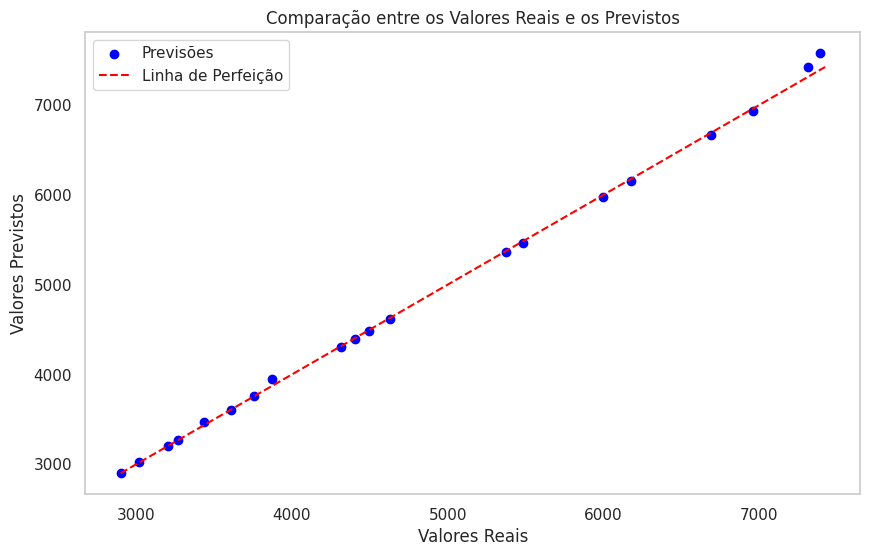

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Previsões')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Linha de Perfeição')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre os Valores Reais e os Previstos')
plt.legend()
plt.grid()
plt.show()

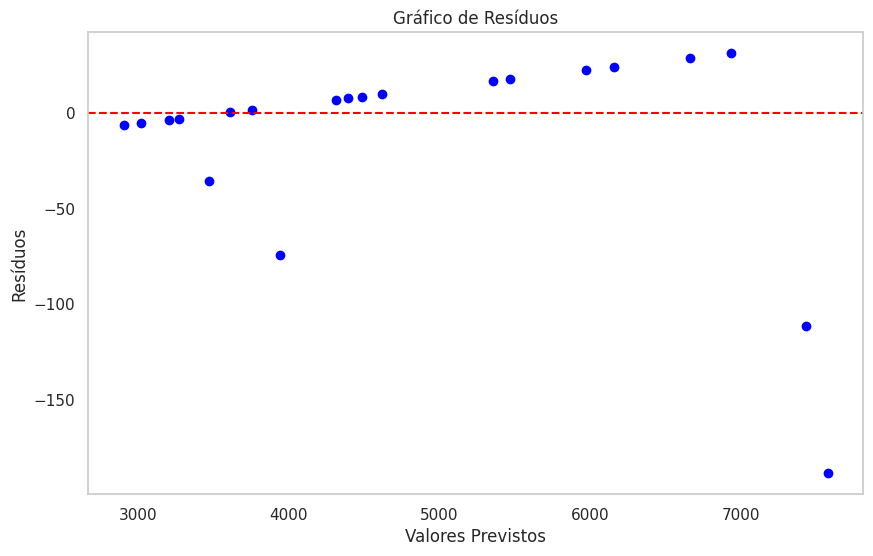

In [54]:
# Gráfico de Resíduos
residuos = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.grid()
plt.show()